Taller 4

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
from scipy.special import wofz
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

Punto 1

Punto 2

In [16]:
x = np.linspace(0,2,100)
c = 1
t= 2
nt = 200
dt = t/200
dx = 2/100
C = (c*dt/dx)
u = np.exp((-125)*((x-(1/2))**2))
           

Dirichlet

In [17]:
u_0 = 0
u_l = 0

def dritchlet(u, C, nx, nt):
    u_actual = np.copy(u)
    u_despues = np.copy(u_actual)
    u_values = []
    for m in range (nt):
        u_simulado = np.copy(u_despues)
        for j in range (1,nx-1):
            u_simulado[j] = (C**2)*(u_despues[j+1]-2*u_despues[j]+u_despues[j-1])+2*u_despues[j]-u_actual[j]

        u_simulado[0] = 0
        u_simulado[-1] = 0
        
        u_actual = np.copy(u_despues)
        u_despues = np.copy(u_simulado)
        u_values.append(np.copy(u_despues))
    return u_values



Neumann

In [18]:
def neumann(u, C, nx, nt):
    u_actual = np.copy(u)
    u_despues = np.copy(u_actual)
    u_values = []
    for m in range (nt):
        u_simulado = np.copy(u_despues)
        for j in range (1,nx-1):
            u_simulado[j] = (C**2)*(u_despues[j+1]-2*u_despues[j]+u_despues[j-1])+2*u_despues[j]-u_actual[j]

        u_simulado[0] = u_simulado[1]
        u_simulado[-1] = u_simulado[-2]
        u_actual = np.copy(u_despues)
        u_despues = np.copy(u_simulado)
        u_values.append(np.copy(u_despues))
    return u_values

periodicas

In [19]:
def periodicas(u, C, nx, nt):
    u_actual = np.copy(u)
    u_despues = np.copy(u_actual)
    u_values = []
    for m in range (nt):
        u_simulado = np.copy(u_despues)
        for j in range (1,nx-1):
            u_simulado[j] = (C**2)*(u_despues[j+1]-2*u_despues[j]+u_despues[j-1])+2*u_despues[j]-u_actual[j]

        u_simulado[0] = (C**2)*(u_despues[1] - 2*u_despues[0] + u_despues[-1]) + 2*u_despues[0] - u_actual[0]
        u_simulado[-1] = (C**2)*(u_despues[0] - 2*u_despues[-1] + u_despues[-2]) + 2*u_despues[-1] - u_actual[-1] 

        u_actual = np.copy(u_despues)
        u_despues = np.copy(u_simulado)
        u_values.append(np.copy(u_despues))
    return u_values

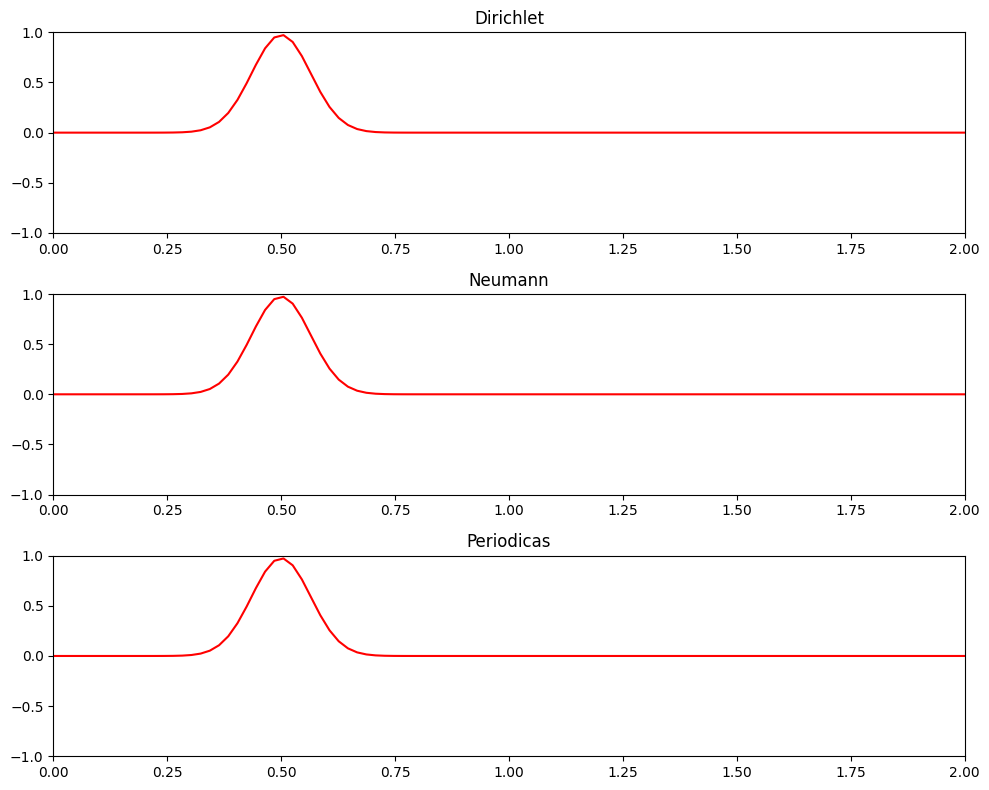

In [20]:
h = dritchlet(u,C,100,200)
w = neumann(u,C,100,200)
z = periodicas(u,C,100,200)
# Animacion
fig, ax= plt.subplots(3,1,figsize=(10, 8))
titulos= ['Dirichlet','Neumann','Periodicas']
 
lines= []
for i in range(3):
    line,= ax[i].plot(x,u,'r')
    lines.append(line)
    ax[i].set_title(titulos[i])
    ax[i].set_ylim(-1,1)
    ax[i].set_xlim(0,2)
plt.tight_layout()
 
 
# Combinada
def update_all(frame):
    lines[0].set_ydata(h[frame])
    lines[1].set_ydata(w[frame])
    lines[2].set_ydata(z[frame])
    return lines
 
ani= animation.FuncAnimation(fig,update_all,frames= nt,interval= 50,blit=True)



In [21]:
writer = animation.PillowWriter(fps=30)

# Guardar la animación como GIF
ani.save("SolucionDeOnda2.gif", writer=writer)

# Mostrar la animación en la pantalla
plt.show()

Punto 3

Punto 4 

In [22]:
x = np.linspace(0,2,100)
y = np.linspace(0,1,100)
c = 1
t= 2
nt = 200
dt = t/200
dx = 2/100
dy = 1/100
C = (c*dt/dx)
u = np.zeros((100, 100))
u_prev=np.zeros(( 100,100))
for i in range(1,99):
    for j in range(1,99):
        #x=i*100
        #y=j*100
        u[i,j]=2*np.exp(-150*((x[i]-(2/5))**2+(y[j]-(1/2))**2))
        u_prev[i,j]=u[i,j]+dt*c*np.exp(-150*((x[i]-(2/5))**2+(y[j]-(1/2))**2))






In [23]:
def dritchlet2D(u, C, nx, ny, nt):
    u_actual = np.copy(u)
    u_despues = np.copy(u_actual)
    u_values = []

    rejx= 2/100
    rejy = 0.2 #### arreglar 

    for m in range (nt):
        u_simulado = np.copy(u_despues)
        for i in range (1, nx-1):
            for j in range (1, ny-1):
                u_simulado[i, j] = (C**2) * ((u_despues[i+1, j] - 2*u_despues[i, j] + u_despues[i-1, j]) + (u_despues[i, j+1] - 2*u_despues[i, j] + u_despues[i, j-1])) + 2*u_despues[i, j] - u_actual[i, j]
       
        u_simulado[0, :] = 0
        u_simulado[-1, :] = 0
        u_simulado[:, 0] = 0
        u_simulado[:, -1] = 0


        u_actual = np.copy(u_despues)
        u_despues = np.copy(u_simulado)
        u_values.append(np.copy(u_despues))
    return u_values

In [24]:
u_values = dritchlet2D(u, C, nx=100, ny=100, nt=nt)

In [25]:
def crear_animacion_gif(u_values, dt, filename='simulacion.gif'):
    
    fig = plt.figure(figsize=(8, 4))
    ax = plt.axes() 

   
    ax.set_xticks([]) 
    ax.set_yticks([])  
     

    def animate(frame):
        ax.clear()  
        ax.set_xticks([])  
        ax.set_yticks([])  
  
        ax.imshow(u_values[frame], cmap='inferno', origin='lower', vmin=0, vmax=np.max(u_values))  # Mostrar la onda
        ax.set_title(f't = {frame * dt:.1f}s', color='white')  # Colocar el tiempo en blanco
        return ax,

    ani = animation.FuncAnimation(fig, animate, frames=len(u_values), interval=100, blit=False)

    ani.save(filename, writer='pillow', fps=10)
    plt.close(fig)
    print(f'Animación guardada como {filename}')

crear_animacion_gif(u_values, dt, filename='simulacion.gif')

Animación guardada como simulacion.gif
